In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Reading File
mobile_data = pd.read_csv(r"C:\Users\Admin\Downloads\Mobile_data.csv",index_col=None,header=0)
mobile_data.head(10)

# Price range is our Target Variable and its a CLASSIFICATION Problem(0,1,2,3)
# where 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
5,1859,0.5,3,22,0.7,164,1,7,1004,1654,1067,17,1,10,1
6,1821,1.7,4,10,0.8,139,8,10,381,1018,3220,13,8,18,3
7,1954,0.5,0,24,0.8,187,4,0,512,1149,700,16,3,5,0
8,1445,0.5,0,53,0.7,174,7,14,386,836,1099,17,1,20,0
9,509,0.6,2,9,0.1,93,5,15,1137,1224,513,19,10,12,0


In [17]:
# Shape
mobile_data.shape

(2000, 15)

In [18]:
# CHECKING DATA TYPE OF EACH VARIABLE
mobile_data.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

All are numeric

In [19]:
# Statistical summary of the data
mobile_data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [20]:
# Viewing unique values present in our dataset
for col in mobile_data.columns:
    print(mobile_data[col].name ,"-->",  mobile_data[col].unique())
    print("--------------------------------------")

battery_power --> [ 842 1021  563 ... 1139 1467  858]
--------------------------------------
clock_speed --> [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
--------------------------------------
fc --> [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
--------------------------------------
int_memory --> [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
--------------------------------------
m_dep --> [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
--------------------------------------
mobile_wt --> [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 1

In [21]:
mobile_data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [22]:
# finding if any missing values

mobile_data.isnull().sum() 

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

This dataset has no missing values

# EDA

In [23]:
## No.of Mobile Phones with Different Price Ranges
plt.figure(figsize=(12,7))
mobile_data["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

<Figure size 864x504 with 0 Axes>

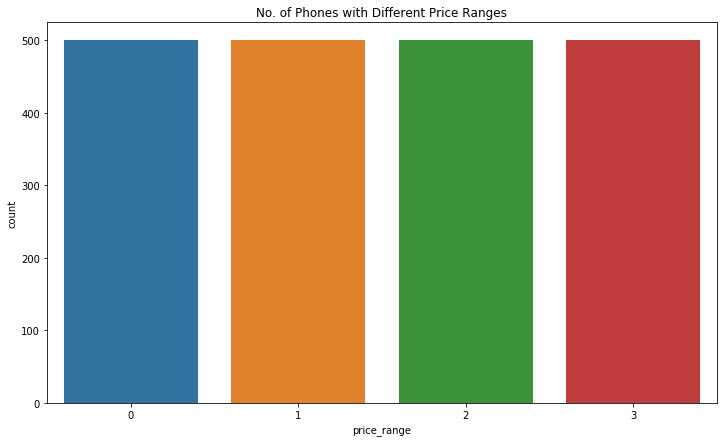

In [24]:
plt.figure(figsize=(12,7))

sns.countplot(x="price_range", data=mobile_data)

plt.title("No. of Phones with Different Price Ranges")
plt.show()

<Figure size 864x504 with 0 Axes>

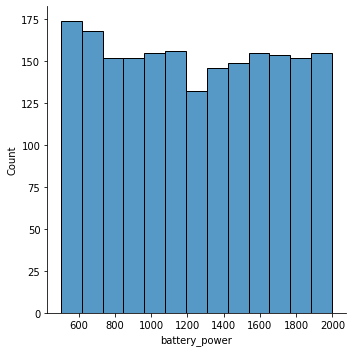

In [25]:
##
plt.figure(figsize=(12,7))

sns.displot(mobile_data["battery_power"])
plt.show()

# It can be seen the Count of mobile phone somewhat decreases when battery_power increases

<Figure size 864x504 with 0 Axes>

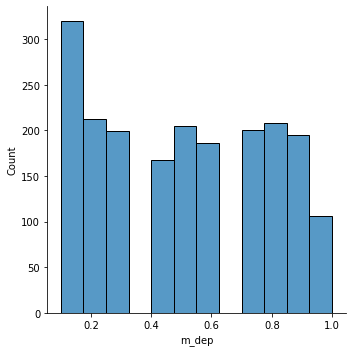

In [26]:
##
plt.figure(figsize=(12,7))

sns.displot(mobile_data["m_dep"])
plt.show()

# We've both thin and almost 1cm thick mobile phones

In [27]:
# Checking Co-relation
data_corr = mobile_data.corr()
data_corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


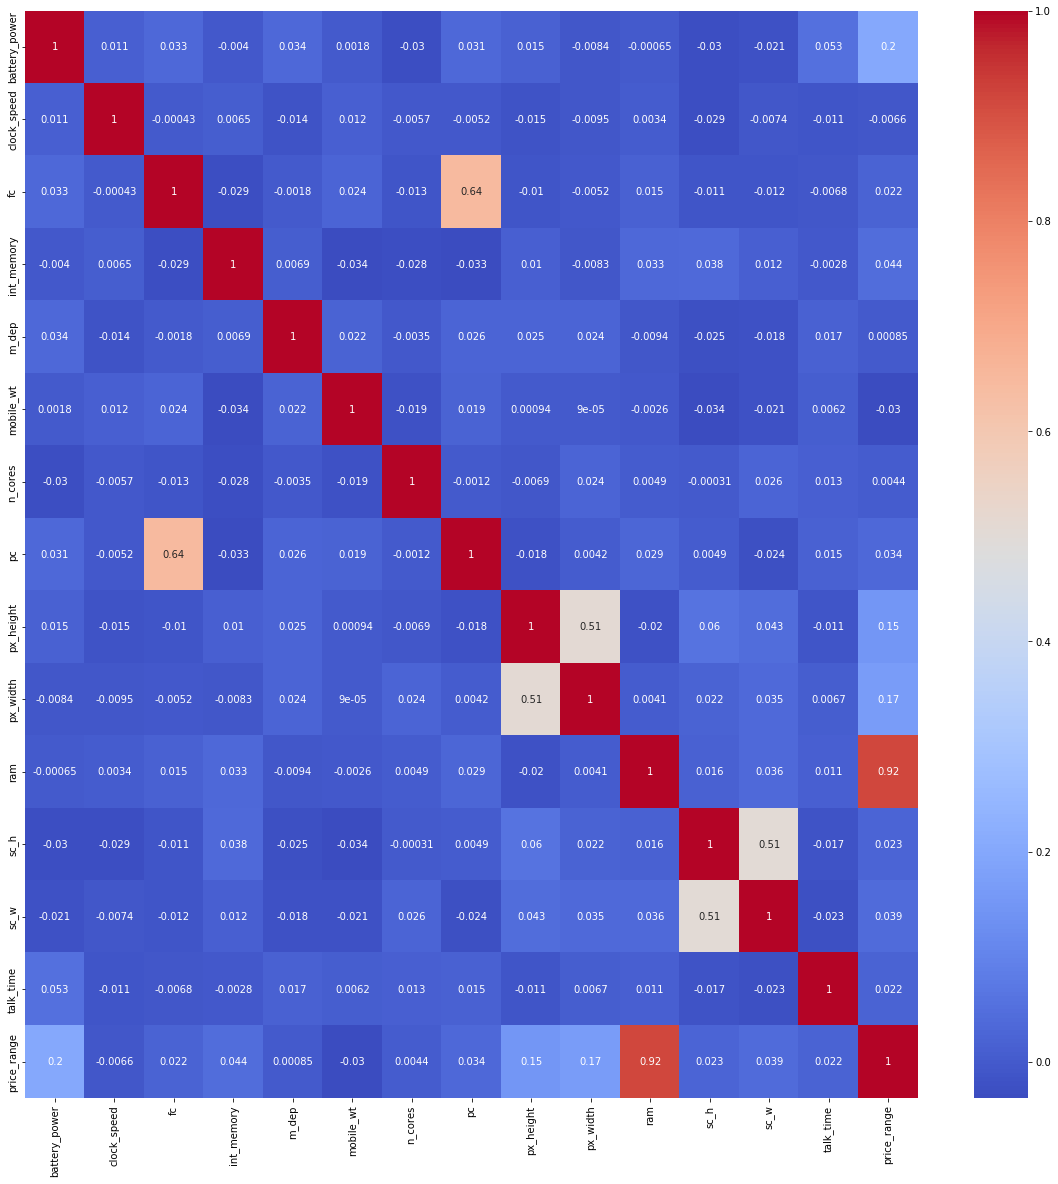

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.show()

No high co-relation so no need to drop any variable

In [29]:
# Creating X independent and Y dependent variable

X = mobile_data.drop(["price_range"], axis=1)
Y = mobile_data["price_range"]

In [30]:
print(X.shape)
print(Y.shape)

(2000, 14)
(2000,)


In [31]:
# Split the data into test and train

from sklearn.model_selection import train_test_split

#80-20 data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1600, 14)
(1600,)
(400, 14)
(400,)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

# BUILDING THE MODEL

Predicting using KNN:

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="euclidean") # k=40

# X_train-->(1600, 14)... 1600sqrt-40

model_KNN.fit(X_train,Y_train)

Y_pred = model_KNN.predict(X_test) 

print(list(zip(Y_test,Y_pred))) 

#(3,3)-->in test it was V.HIGH and on predicting it still shows V.HIGH ....correct ans by model
#(2,1)-->in test it was HIGH and on predicting it shows MEDIUM....incorrect ans by model

[(3, 3), (3, 2), (2, 1), (3, 3), (1, 0), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 2), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (3, 3), (2, 3), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 1), (3, 3), (3, 3), (1, 1), (1, 1), (2, 2), (0, 1), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (1, 0), (2, 3), (0, 0), (3, 3), (2, 1), (2, 1), (0, 1), (1, 1), (3, 3), (1, 1), (0, 0), (1, 0), (2, 2), (1, 1), (3, 3), (2, 2), (3, 3), (2, 3), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (1, 1), (1, 2), (3, 2), (2, 3), (2, 2), (1, 1), (1, 0), (3, 3), (2, 1), (3, 2), (3, 3), (2, 2), (1, 1), (3, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 3), (2, 2), (3, 2), (3, 3), (3, 3), (2, 2), (3, 2), (3, 3), (3, 3), (3, 3), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (3, 2), (0, 0), (1, 1), (2, 1), (1, 1), (3, 3), (2, 3), (1, 1), (2, 1), (2, 1), (2, 2), (0, 0), (3, 3), (1, 1), (2, 2), (1, 0), (1, 1), (2, 1), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 3), (1, 1),

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

# 80,66,70,72 are the correct ones
# Total 112 Missclassifications (12+14+16+1+24+15+1+29)

[[80 12  0  0]
 [14 66 16  1]
 [ 0 24 70 15]
 [ 0  1 29 72]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        92
           1       0.64      0.68      0.66        97
           2       0.61      0.64      0.62       109
           3       0.82      0.71      0.76       102

    accuracy                           0.72       400
   macro avg       0.73      0.72      0.73       400
weighted avg       0.73      0.72      0.72       400

Accuracy of the model:  0.72


In [36]:
from sklearn.metrics import accuracy_score

my_dict={}

for K in range(1,41):                # since k=40 
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    
    my_dict[K]=accuracy_score(Y_test,Y_pred)
    

#here,removing individual Accuracy score for all K values from 1 to 40
#above,removed Accuracy Score for value k=40... 

Accuracy is  0.5325 for K-Value: 1
Accuracy is  0.52 for K-Value: 2
Accuracy is  0.53 for K-Value: 3
Accuracy is  0.5525 for K-Value: 4
Accuracy is  0.575 for K-Value: 5
Accuracy is  0.5825 for K-Value: 6
Accuracy is  0.5675 for K-Value: 7
Accuracy is  0.59 for K-Value: 8
Accuracy is  0.5925 for K-Value: 9
Accuracy is  0.6225 for K-Value: 10
Accuracy is  0.6275 for K-Value: 11
Accuracy is  0.64 for K-Value: 12
Accuracy is  0.63 for K-Value: 13
Accuracy is  0.64 for K-Value: 14
Accuracy is  0.64 for K-Value: 15
Accuracy is  0.6625 for K-Value: 16
Accuracy is  0.6575 for K-Value: 17
Accuracy is  0.685 for K-Value: 18
Accuracy is  0.69 for K-Value: 19
Accuracy is  0.6775 for K-Value: 20
Accuracy is  0.66 for K-Value: 21
Accuracy is  0.68 for K-Value: 22
Accuracy is  0.7 for K-Value: 23
Accuracy is  0.6925 for K-Value: 24
Accuracy is  0.69 for K-Value: 25
Accuracy is  0.6875 for K-Value: 26
Accuracy is  0.685 for K-Value: 27
Accuracy is  0.695 for K-Value: 28
Accuracy is  0.6775 for K-Valu

When K=40 we get highest Accuracy Score

In [37]:
# NOW,trying with different metric MANHATTAN

model_KNN=KNeighborsClassifier(n_neighbors=40,metric="manhattan")         #k=40 from above

#fit the model on the data and predict the values

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

print(list(zip(Y_test,Y_pred)))

[(3, 3), (3, 2), (2, 1), (3, 3), (1, 0), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 1), (3, 3), (2, 3), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 2), (3, 3), (1, 1), (1, 1), (2, 2), (0, 1), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (1, 0), (2, 1), (0, 0), (3, 3), (2, 2), (2, 1), (0, 0), (1, 1), (3, 3), (1, 1), (0, 0), (1, 0), (2, 2), (1, 1), (3, 3), (2, 2), (3, 2), (2, 2), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (1, 0), (1, 2), (3, 2), (2, 3), (2, 2), (1, 1), (1, 1), (3, 3), (2, 2), (3, 3), (3, 3), (2, 2), (1, 1), (3, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 3), (2, 2), (3, 3), (3, 3), (3, 3), (2, 1), (3, 3), (3, 3), (3, 3), (3, 3), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (3, 2), (0, 0), (1, 1), (2, 2), (1, 2), (3, 3), (2, 1), (1, 1), (2, 1), (2, 1), (2, 1), (0, 0), (3, 3), (1, 1), (2, 2), (1, 1), (1, 1), (2, 1), (3, 3), (0, 0), (1, 1), (0, 1), (3, 3), (2, 2), (1, 1),

In [38]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)     

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[82 10  0  0]
 [20 65 12  0]
 [ 1 25 69 14]
 [ 0  0 19 83]]
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        92
           1       0.65      0.67      0.66        97
           2       0.69      0.63      0.66       109
           3       0.86      0.81      0.83       102

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

Accuracy of the model:  0.7475


In [39]:
# NOW,trying with different metric MINKOWSKI 

model_KNN=KNeighborsClassifier(n_neighbors=40,metric="minkowski")       #k=40 from above

#fit the model on the data and predict the values

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

print(list(zip(Y_test,Y_pred)))

[(3, 3), (3, 2), (2, 1), (3, 3), (1, 0), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 2), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (3, 3), (2, 3), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 1), (3, 3), (3, 3), (1, 1), (1, 1), (2, 2), (0, 1), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (1, 0), (2, 3), (0, 0), (3, 3), (2, 1), (2, 1), (0, 1), (1, 1), (3, 3), (1, 1), (0, 0), (1, 0), (2, 2), (1, 1), (3, 3), (2, 2), (3, 3), (2, 3), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (1, 1), (1, 2), (3, 2), (2, 3), (2, 2), (1, 1), (1, 0), (3, 3), (2, 1), (3, 2), (3, 3), (2, 2), (1, 1), (3, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 3), (2, 2), (3, 2), (3, 3), (3, 3), (2, 2), (3, 2), (3, 3), (3, 3), (3, 3), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (3, 2), (0, 0), (1, 1), (2, 1), (1, 1), (3, 3), (2, 3), (1, 1), (2, 1), (2, 1), (2, 2), (0, 0), (3, 3), (1, 1), (2, 2), (1, 0), (1, 1), (2, 1), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 3), (1, 1),

In [40]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[80 12  0  0]
 [14 66 16  1]
 [ 0 24 70 15]
 [ 0  1 29 72]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        92
           1       0.64      0.68      0.66        97
           2       0.61      0.64      0.62       109
           3       0.82      0.71      0.76       102

    accuracy                           0.72       400
   macro avg       0.73      0.72      0.73       400
weighted avg       0.73      0.72      0.72       400

Accuracy of the model:  0.72


In [41]:
# Euclidean and Minkowski gave same Accuracy Score
# Manhattan gave Highest Accuracy Score among all the metrics

Predicting using Logistic Regression:

In [42]:
from sklearn.linear_model import LogisticRegression

#create a model
classifier = LogisticRegression(multi_class="multinomial",random_state=10)  #since,we've multiclass

#fitting training data to the model and predict the values
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test) 
print(list(zip(Y_test,Y_pred)))

[(3, 3), (3, 3), (2, 2), (3, 3), (1, 1), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (3, 3), (2, 2), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 2), (3, 3), (1, 1), (1, 1), (2, 2), (0, 0), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (0, 0), (3, 3), (2, 2), (2, 2), (0, 0), (1, 1), (3, 3), (1, 1), (0, 0), (1, 1), (2, 2), (1, 1), (3, 3), (2, 2), (3, 3), (2, 2), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (1, 1), (1, 2), (3, 3), (2, 2), (2, 2), (1, 1), (1, 1), (3, 3), (2, 1), (3, 3), (3, 3), (2, 2), (1, 1), (3, 2), (0, 0), (1, 0), (0, 0), (0, 0), (3, 3), (2, 2), (3, 3), (3, 3), (3, 3), (2, 2), (3, 3), (3, 3), (3, 3), (3, 3), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (3, 3), (0, 0), (1, 1), (2, 1), (1, 1), (3, 3), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (0, 0), (3, 3), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (1, 1),

In [43]:
cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)  

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

# 2,1,5,2,3 are the MISSCLASSIFICATIONS

[[ 92   0   0   0]
 [  2  94   1   0]
 [  0   5 102   2]
 [  0   0   3  99]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       0.95      0.97      0.96        97
           2       0.96      0.94      0.95       109
           3       0.98      0.97      0.98       102

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Accuracy of the model:  0.9675


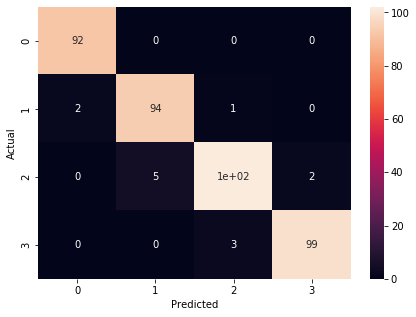

In [44]:
# confusion matrix graph

%matplotlib inline

plt.figure(figsize=(7,5))
sns.heatmap(cfm, annot=True)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Logistic Regression gives higher accuracy than KNN...it means the data wasn't noisy as KNN is
suitable for NOISY DATA

Predicting using SVM Classifier:

In [45]:
from sklearn.svm import SVC

# create a model
svm = SVC(kernel="rbf", gamma=0.1, C=1, random_state=10) 

#fitting training data to the model and predict the values
svm.fit(X_train,Y_train)

Y_pred = svm.predict(X_test) 
#print(Y_pred)

print(list(zip(Y_test,Y_pred)))

[(3, 3), (3, 3), (2, 2), (3, 3), (1, 1), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (3, 3), (2, 2), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 2), (3, 3), (1, 1), (1, 1), (2, 2), (0, 0), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (1, 0), (2, 3), (0, 0), (3, 3), (2, 2), (2, 2), (0, 0), (1, 1), (3, 3), (1, 1), (0, 0), (1, 1), (2, 1), (1, 1), (3, 3), (2, 2), (3, 3), (2, 2), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (1, 1), (1, 2), (3, 3), (2, 2), (2, 2), (1, 1), (1, 1), (3, 3), (2, 1), (3, 3), (3, 3), (2, 2), (1, 1), (3, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 3), (2, 2), (3, 2), (3, 3), (3, 3), (2, 1), (3, 3), (3, 3), (3, 3), (3, 3), (1, 2), (0, 0), (1, 1), (0, 0), (1, 1), (3, 3), (0, 0), (1, 1), (2, 2), (1, 1), (3, 3), (2, 2), (1, 1), (2, 2), (2, 1), (2, 2), (0, 0), (3, 3), (1, 1), (2, 2), (1, 1), (1, 1), (2, 1), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (1, 1),

In [46]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[86  6  0  0]
 [ 5 84  8  0]
 [ 0 12 92  5]
 [ 0  0 10 92]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        92
           1       0.82      0.87      0.84        97
           2       0.84      0.84      0.84       109
           3       0.95      0.90      0.92       102

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Accuracy of the model:  0.885


Predicting using Decision Tree Classifier:

In [47]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)    

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)

print(list(zip(Y_test,Y_pred)))

[(3, 2), (3, 3), (2, 1), (3, 3), (1, 1), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (3, 3), (2, 2), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 2), (3, 3), (1, 1), (1, 1), (2, 1), (0, 0), (3, 3), (2, 3), (2, 2), (2, 2), (1, 1), (1, 0), (2, 2), (0, 0), (3, 3), (2, 2), (2, 3), (0, 0), (1, 1), (3, 3), (1, 1), (0, 0), (1, 1), (2, 1), (1, 1), (3, 3), (2, 2), (3, 2), (2, 2), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (0, 0), (2, 2), (0, 0), (2, 2), (1, 0), (1, 2), (3, 3), (2, 3), (2, 1), (1, 1), (1, 1), (3, 3), (2, 1), (3, 3), (3, 3), (2, 2), (1, 1), (3, 3), (0, 1), (1, 1), (0, 0), (0, 0), (3, 3), (2, 1), (3, 3), (3, 3), (3, 3), (2, 1), (3, 2), (3, 3), (3, 3), (3, 3), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (3, 3), (0, 0), (1, 1), (2, 2), (1, 2), (3, 3), (2, 2), (1, 1), (2, 2), (2, 1), (2, 2), (0, 0), (3, 3), (1, 2), (2, 1), (1, 1), (1, 1), (2, 1), (3, 3), (0, 0), (1, 1), (0, 1), (3, 3), (2, 2), (1, 1),

In [48]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[80 12  0  0]
 [ 6 80 11  0]
 [ 0 22 77 10]
 [ 0  0  8 94]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        92
           1       0.70      0.82      0.76        97
           2       0.80      0.71      0.75       109
           3       0.90      0.92      0.91       102

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Accuracy of the model:  0.8275


Predicting using Random Forest Classifier:

In [49]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10,bootstrap=True,   
                                         max_features=None)   

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred = model_RandomForest.predict(X_test)
#print(Y_pred)

print(list(zip(Y_test,Y_pred)))

[(3, 3), (3, 3), (2, 2), (3, 3), (1, 1), (3, 3), (3, 3), (3, 3), (1, 1), (3, 3), (2, 2), (3, 3), (0, 0), (1, 1), (0, 0), (3, 3), (2, 2), (3, 3), (2, 2), (2, 2), (3, 3), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (3, 2), (3, 3), (1, 1), (1, 1), (2, 2), (0, 0), (3, 3), (2, 3), (2, 2), (2, 2), (1, 1), (1, 0), (2, 2), (0, 0), (3, 3), (2, 2), (2, 2), (0, 0), (1, 1), (3, 3), (1, 1), (0, 0), (1, 1), (2, 2), (1, 1), (3, 3), (2, 2), (3, 2), (2, 2), (3, 3), (2, 2), (3, 3), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (2, 3), (0, 0), (2, 2), (1, 0), (1, 2), (3, 3), (2, 2), (2, 2), (1, 0), (1, 1), (3, 3), (2, 1), (3, 3), (3, 3), (2, 2), (1, 1), (3, 3), (0, 0), (1, 1), (0, 0), (0, 0), (3, 3), (2, 2), (3, 2), (3, 3), (3, 3), (2, 1), (3, 3), (3, 3), (3, 3), (3, 3), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (3, 3), (0, 0), (1, 1), (2, 2), (1, 1), (3, 3), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (0, 0), (3, 3), (1, 1), (2, 2), (1, 1), (1, 1), (2, 1), (3, 3), (0, 0), (1, 1), (0, 1), (3, 3), (2, 2), (1, 1),

In [50]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[82 10  0  0]
 [ 4 91  2  0]
 [ 0  9 89 11]
 [ 0  0  5 97]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        92
           1       0.83      0.94      0.88        97
           2       0.93      0.82      0.87       109
           3       0.90      0.95      0.92       102

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Accuracy of the model:  0.8975


# Selecting the Best Model

In [ ]:
"""
KNN:
Accuracy of the model: 0.7475 (with MANHATTAN METRIC)

LOGISTIC REGRESSION:
Accuracy of the model: 0.9675

SVM:
Accuracy of the model: 0.885

DECISION TREE:
Accuracy of the model: 0.8275

RANDOM FOREST:
Accuracy of the model: 0.8975
"""

LOGISTIC REGRESSION IS THE BEST MODEL AMONG ALL WITH THE HIGHEST ACCURACY SCORE

# TRAINING THE DATASET WITH LOGISTIC REGRESSION AND COMPARING WITH Y_TEST

In [51]:
#fitting training data to the model and predicting
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test) 
#print(Y_pred)


In [52]:
compare = pd.DataFrame({"Y_test/actual":Y_test,"Y_pred":Y_pred})
compare.sample(20)

,Y_test/actual,Y_pred
731,2,2
512,0,0
1831,1,1
191,2,2
1893,3,3
1655,3,3
1806,1,1
1915,2,2
1186,2,2
1227,2,2


In [53]:
compare.shape

(400, 2)